In [7]:
#http://d.hatena.ne.jp/naraba/20121201/p1
#http://web.mit.edu/music21/doc/usersGuide/usersGuide_01_installing.html

from music21 import *
environment.set('musicxmlPath' , r"C:\Program Files (x86)\Finale NotePad 2012\Finale NotePad.exe")
#configure.run()
#environment.keys()
#environment.get('musicxmlPath')

楽譜を表示するためのおまじない

参考URL:https://groups.google.com/forum/#!topic/music21list/FmU6HeNm7AM


In [8]:
us = environment.UserSettings()
#us.create()
us['musicxmlPath'] = r'C:\Program Files (x86)\MuseScore 2\bin\MuseScore.exe'
us['musescoreDirectPNGPath'] = r'C:\Program Files (x86)\MuseScore 2\bin\MuseScore.exe'
%load_ext music21.ipython21

The music21.ipython21 extension is already loaded. To reload it, use:
  %reload_ext music21.ipython21


## シンプルな例からスタート

insert works as expected if it is "Note to Stream"

In [9]:
st1=stream.Stream()
st1.insert(0,note.Note("B-5"))
st1.show()

位置を指定して挿入する場合はinsertを使う

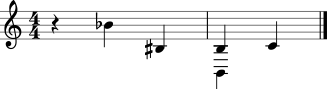

In [18]:
st1=stream.Stream()
st1.insert(1,note.Note("B-4"))
st1.insert(2,note.Note("B#3"))
st1.insert(4 , note.Note("B3"))
st1.insert(4 , note.Note("B2"))
st1.insert(5 , note.Note("C4"))
st1.show()

appendは最後に追加してくれるので位置の指定をしなくてよくて便利

In [ ]:
st1.append(note.Note("C4"))
st1.show()

C4をMajor 3rd(長三度)だけシフトした音すなわちE4を追加

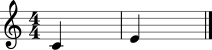

In [20]:
st1=stream.Stream()
st1.insert(0 , note.Note("C4"))
st1.insert(6 , note.Note("C4").transpose("M3"))
st1.show()

E4をdouble diminished 6th（重減６度？）だけシフトした音を追加。
ただし、double diminishedやdouble augumentedが実際に使われることはまれとのこと。
（https://en.wikipedia.org/wiki/Interval_(music)#Main_intervals
を参照。日本語版wikipediaはいまいちなので英語版を見ること）



その他の参考URL：

http://guitarchord-lab.com/theory/interval.html



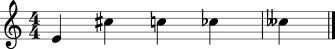

In [27]:
st1 = stream.Stream()
st1.append(note.Note("E4"))
st1.append(note.Note("E4").transpose("M6"))
st1.append(note.Note("E4").transpose("m6"))
st1.append(note.Note("E4").transpose("d6"))
st1.append(note.Note("E4").transpose("dd6"))
st1.show()

なお、例えばC4の重減六度なるものは存在しないっぽい。したがって普通にラ（長６度・Major 6th）がappendされてしまう。

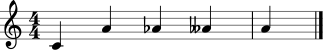

In [22]:
st1=stream.Stream()
st1.append(note.Note("C4"))
st1.append(note.Note("C4").transpose("M6"))
st1.append(note.Note("C4").transpose("m6"))
st1.append(note.Note("C4").transpose("d6"))
st1.append(note.Note("C4").transpose("dd6"))
st1.show()

そして６度には完全６度というものは存在しない

In [ ]:
st1=stream.Stream()
st1.append(note.Note("C4").transpose("P6")) #returns error

offsetの範囲を調べるには以下のようにすればいいだろう（？）

In [30]:
st1 = stream.Stream()
st1.append(note.Note("E4"))
st1.append(note.Note("E4").transpose("M6"))
st1.append(note.Note("E4").transpose("m6"))
st1.append(note.Note("E4").transpose("d6"))
st1.append(note.Note("E4").transpose("dd6"))
max_offset = max([x.offset for x in st1])
print(max_offset)

4.0


最後に付け加えるのをinsertでやるのであれば、以下のようにすればよいだろう

In [ ]:
st1.insert(max_offset + 1 , note.Note("C3"))
st1.show()

appendは以下のようにまとめて行うことができる（ただし、和音を付け加えるような動作ではない）

In [ ]:
st1.append([note.Note("D4") , note.Note("E4")])
st1.show()

以下のように和音を追加することはできない・・

In [ ]:
st1.insert(max_offset + 1 , [note.Note("D4") , note.Note("E4")])
st1.show()

## score, part, measureについて

scoreとPartとMeasureがstreamの基本的なsubclass

scoreがpartを複数含み、partはmeasureを複数持つ

In [ ]:
s_parts = [x for x in s.parts]
measures = [x for x in s_parts[0].getElementsByClass(stream.Measure)]
type(measures[0])

In [ ]:
s.flat

例としてバッハの楽譜xmlファイルを読み込む

In [82]:
s_bach = corpus.parse('bach/bwv65.2.xml')

このscore sは４つのPartから構成される。

各Partは各楽器に対応していて、それぞれひとつずつPartがある。

In [35]:
[type(x) for x in s_bach.getElementsByClass(stream.Stream)] #a lot of "Part"s

[music21.stream.Part,
 music21.stream.Part,
 music21.stream.Part,
 music21.stream.Part]

この例ではPartはmeasure(小節)から成る。

In [94]:
[" ".join([str(type(y)) for y in x.getElementsByClass(stream.Stream)]) for x in s_bach.getElementsByClass(stream.Stream)]

["<class 'music21.stream.Measure'> <class 'music21.stream.Measure'> <class 'music21.stream.Measure'> <class 'music21.stream.Measure'> <class 'music21.stream.Measure'> <class 'music21.stream.Measure'> <class 'music21.stream.Measure'> <class 'music21.stream.Measure'> <class 'music21.stream.Measure'> <class 'music21.stream.Measure'> <class 'music21.stream.Measure'> <class 'music21.stream.Measure'> <class 'music21.stream.Measure'> <class 'music21.stream.Measure'> <class 'music21.stream.Measure'> <class 'music21.stream.Measure'> <class 'music21.stream.Measure'>",
 "<class 'music21.stream.Measure'> <class 'music21.stream.Measure'> <class 'music21.stream.Measure'> <class 'music21.stream.Measure'> <class 'music21.stream.Measure'> <class 'music21.stream.Measure'> <class 'music21.stream.Measure'> <class 'music21.stream.Measure'> <class 'music21.stream.Measure'> <class 'music21.stream.Measure'> <class 'music21.stream.Measure'> <class 'music21.stream.Measure'> <class 'music21.stream.Measure'> <cla

ただし、

http://web.mit.edu/music21/doc/usersGuide/usersGuide_06_stream2.html

に注意があるように、PartはtimeSignatureやkeySignatureなども格納できるので、getElementByClassでアクセスするほうが安全:

In [47]:
print(len([x for x in s_bach]))
print(len([type(x) for x in s_bach.getElementsByClass(stream.Stream)] ))

6
4


deepjazzの例ではPartはMeasureを持たず、その代わり（？）にVoiceを持っている：

In [87]:
s_jazz = converter.parse('C:/Users/t/PycharmProjects/deepjazz_in_a_file/midi/original_metheny.mid')

In [88]:
s_jazz_parts = [x for x in s_jazz.getElementsByClass(stream.Part)]
len(s_jazz_parts)

19

In [89]:
s_jazz_part0_voices = [x for x in s_jazz_parts[0].getElementsByClass(stream.Voice)]
len(s_jazz_part0_voices)

5

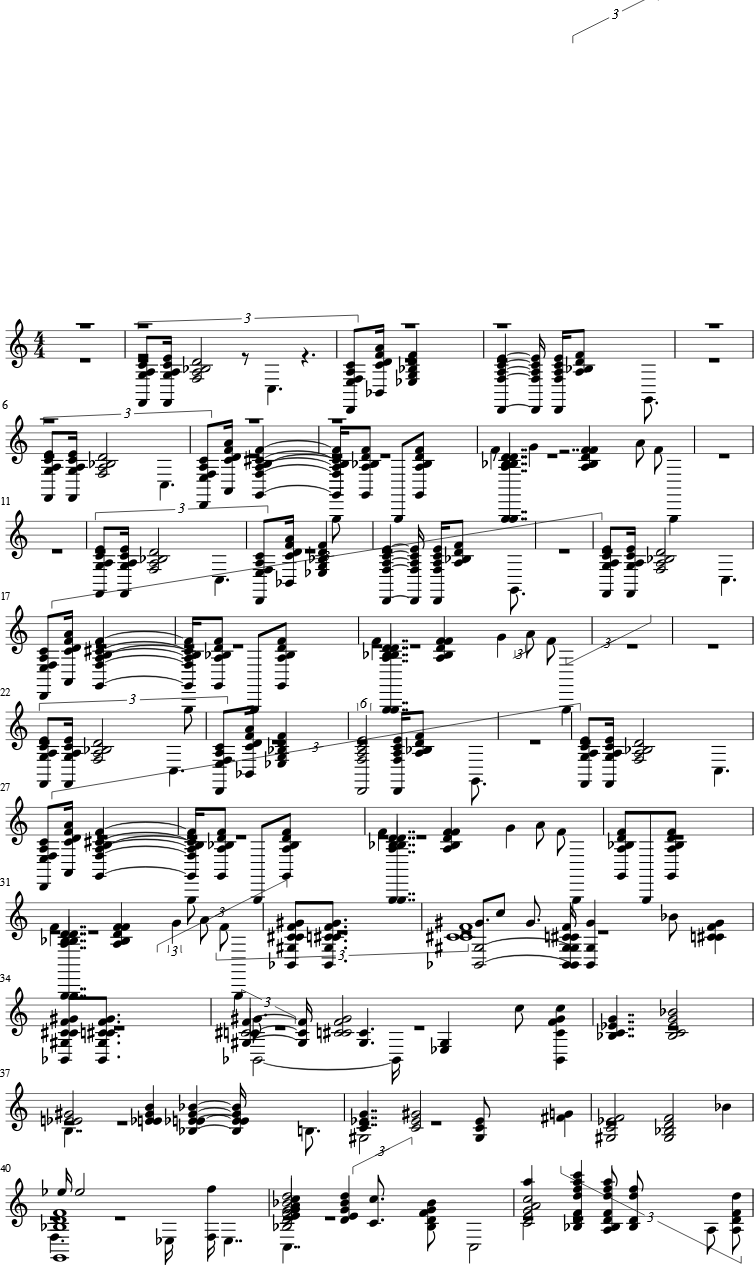

In [56]:
s_jazz_part0_voices.show()

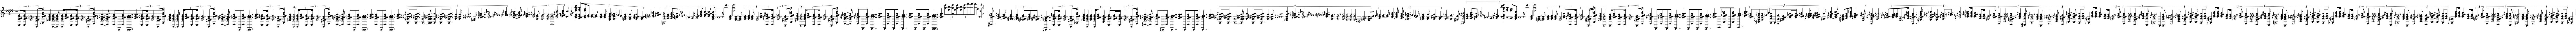

In [85]:
s2_part0_voices[0].show()

VoiceのなかにMeasureがあるかと思いきやそんなものはない：

In [90]:
len(s_jazz_part0_voices[0].getElementsByClass(stream.Measure))

0

ではなにが入っているかといえば、（ScoreのなかのPartのなかの）各VoiceはおおむねChordから構成されている（他はnote.Rest, note.Noteが少々）：

In [91]:
"   ".join([str(type(x)) for x in s_jazz_part0_voices[0]])

"<class 'music21.note.Rest'>   <class 'music21.chord.Chord'>   <class 'music21.chord.Chord'>   <class 'music21.chord.Chord'>   <class 'music21.chord.Chord'>   <class 'music21.chord.Chord'>   <class 'music21.chord.Chord'>   <class 'music21.chord.Chord'>   <class 'music21.chord.Chord'>   <class 'music21.chord.Chord'>   <class 'music21.chord.Chord'>   <class 'music21.chord.Chord'>   <class 'music21.chord.Chord'>   <class 'music21.chord.Chord'>   <class 'music21.chord.Chord'>   <class 'music21.chord.Chord'>   <class 'music21.chord.Chord'>   <class 'music21.note.Note'>   <class 'music21.chord.Chord'>   <class 'music21.chord.Chord'>   <class 'music21.chord.Chord'>   <class 'music21.chord.Chord'>   <class 'music21.chord.Chord'>   <class 'music21.chord.Chord'>   <class 'music21.chord.Chord'>   <class 'music21.chord.Chord'>   <class 'music21.chord.Chord'>   <class 'music21.chord.Chord'>   <class 'music21.chord.Chord'>   <class 'music21.chord.Chord'>   <class 'music21.chord.Chord'>   <class 'mus

In [92]:
s_jazz.show??

In [ ]:
s2 = [(x) for x  in s.flat.getElementsByClass(note.Note)]#example of how to flatten the scoreb

In [ ]:
print(type(s2))#score

### その他の基本的なscoreに対する操作(あまり必要ないかも)

In [32]:
s.analyze('key')

<music21.key.Key of a minor>

s.show('midi')

s.show()

## tinynotationについて

In [ ]:
p = converter.parse("tinynotation: 3/4 c4 d8 f g16 a g f#")

In [ ]:
s2 = stream.Stream()
s2.insert(0  , p)#adding part, first argument should be offset??

In [ ]:
s2.show()

In [ ]:
q=converter.parse("tinynotation: c4 d8 f g16 a g f#")
s2.insert(100,q)

In [ ]:
s2.show()

In [ ]:
r=converter.parse("tinynotation: c4 d8 f g16 a g f#")
s2.insert(10,r)
s2.show()

In [ ]:
s2.insert?